In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings


parent_dir = os.path.abspath("..")
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
from _custom_func import load_data, extract_data


sns.set_style("darkgrid")
pd.set_option("display.max_columns", None)
sklearn.set_config(display="diagram")


warnings.filterwarnings("ignore")

extract_data("../datasets/advertising.zip")

print("\n💯 😊 \033[034mSetup successfully loaded to memory.\033[om 💹")


💯 😊 Setup successfully loaded to memory.m 💹


In [2]:
df = load_data("./data/advertising.csv")
df.head()


Data loaded successfully . . .


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


The data contains no missing value, but future data may have missing values.

In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## **Exploratory data analysis**

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

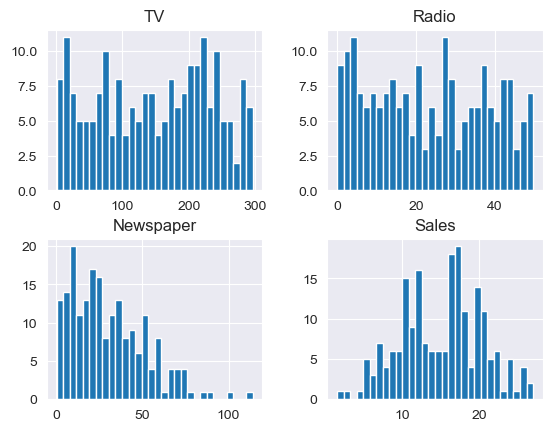

In [5]:
df.hist(bins=30)

The data needs some transformation beause the distribution does not resemble a normal distribution. The newspaper seems to be skewed to the right.

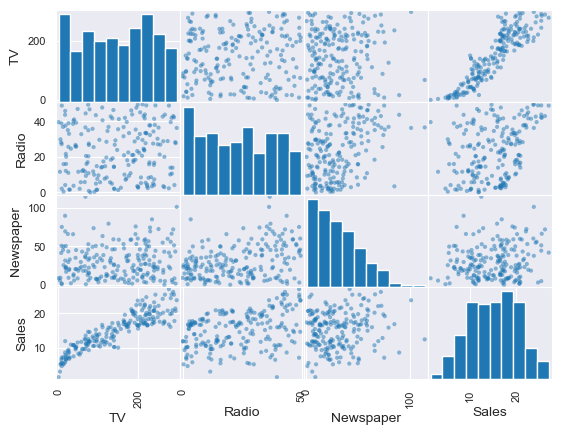

In [6]:
pd.plotting.scatter_matrix(df);

From the plot, all the attributes contribute positively to sales. The TV advert strongly contribute to sales. To see if the features correlate with themselves.

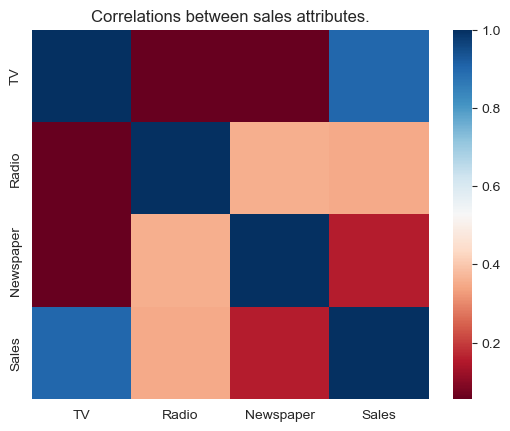

In [7]:
fig, ax = plt.subplots()
ax = sns.heatmap(df.corr(), cmap="RdBu")
ax.set_title("Correlations between sales attributes.");

## **Prepare data**

In [8]:
X = df.drop("Sales", axis=1)
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Train a model**
The model that works here is the Linear Regression. Form the scatter matrix, all the attributes have positive correlation with sales, and hence, a linear regression model will perform well, with a performance metric of mean absolute error.

### **Baseline**

In [9]:
y_pred_baseline = [y_train.mean()] * len(y_train)
mean_absolute_error(y_train, y_pred_baseline)

4.290828125

### **Linear regression**

In [10]:
preprocessing = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

model = make_pipeline(
    preprocessing, LinearRegression()
)

model.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('linearregression', LinearRegression())])

In [11]:
y_pred = model.predict(X_train)
mean_absolute_error(y_train, y_pred)

1.2344160869575866

## **Communicate results**

In [12]:
coef = model.named_steps["linearregression"].coef_
intercept = model.named_steps["linearregression"].intercept_

print("-"*125 + f"\nSales = { round(intercept, 4) } + { round(coef[0], 4) }*TV + { round(coef[1], 4) }*Radio + { round(coef[2], 4) }*Newspaper\n" + "-"*125)

-----------------------------------------------------------------------------------------------------------------------------
Sales = 15.3306 + 4.5872*TV + 1.4898*Radio + 0.0879*Newspaper
-----------------------------------------------------------------------------------------------------------------------------


___
Muyiwa Obadara - muyiwa.j.obadara@gmail.com